# Data Preparation Logistic Regression

### Importing the Data Subset
After importing the `restaurants_final.csv` we will check the data to ensure that data is not corrupted.

**Importing**

The first step is to import all modules and libraries which will be used throughout this part. Afterwards, the dataframe will be imported.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pyarrow
import joblib

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix 
from sklearn.metrics import precision_score, recall_score, classification_report, roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# to display all columns
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
# Read in the csv file
df = pd.read_csv(r'data\restaurants_final.csv')

In [4]:
# view the data
df.head(3)

,latitude,longitude,stars,review_count,is_open,is_chain,Num_of_attributes_shared,RestaurantsPriceRange2,RestaurantsTakeOut_True,RestaurantsTakeOut_False,RestaurantsDelivery_True,RestaurantsDelivery_False,OutdoorSeating_True,OutdoorSeating_False,RestaurantsReservations_True,RestaurantsReservations_False,RestaurantsGoodForGroups_True,RestaurantsGoodForGroups_False,GoodForKids_True,GoodForKids_False,Nightlife,Bars,Sandwiches,American (Traditional),American (New),Fast Food,Breakfast & Brunch,Pizza,Burgers,Coffee & Tea,Mexican,Cafes,Seafood,Italian,Chicken Wings,Salad,Event Planning & Services,Latin American,Food Trucks,Specialty Food,Chinese,Delis,Sushi Bars,Desserts,Caterers,repeat_users,age,reviews_per_week,reactions_per_week,sentiment_score,review_length,user_stars,similar_restaurants_density,all_restaurants_density,relative_reviews_count,relative_reviews_per_week,relative_stars,relative_user_stars,relative_repeat_users,relative_price
0,27.955269,-82.456320,4.0,10,1,0,6,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,2.641096,0.061257,0.284010,0.743791,79.818182,5.0,5.0,171.0,-0.405611,-0.513680,0.402896,1.004273,-0.254448,0.509729
1,28.046203,-82.505053,4.0,23,0,0,17,2,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.0,1.383562,0.346535,1.136634,0.746572,117.360000,4.0,6.0,52.0,-0.693516,-0.004916,0.635198,0.212100,-0.371092,1.039230
2,27.960514,-82.506127,4.0,35,0,0,18,1,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,4.816438,0.147327,0.127418,0.680449,78.189189,4.0,4.0,57.0,-0.524659,-0.597908,0.618025,0.333430,-0.400298,-1.146068


In [5]:
# check the shape of data
df.shape

(2881, 60)

In [6]:
df.columns[4]

'is_open'

## (Optional) Working with a Sample

When working with massive datasets containing millions of rows, it's a good idea to work with a sample initially. If you'd like to work with a sample, just set the value of `use_sample` to `True`.

In [7]:
use_sample = False

In [8]:
sample_fraction = 0.1

In [9]:
if use_sample:
    df = raw_df.sample(frac=sample_fraction).copy()

## imputing, scaling and encoding

We now perform imputing, scaling and encoding to prepare the data for the model training. 

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Identify input and target columns
input_cols, target_col = df.columns[5:-1], df.columns[4]
inputs_df, targets = df[input_cols].copy(), df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = df[input_cols].select_dtypes(include='object').columns.tolist()

# Impute and scale numeric columns
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

Note that the target column by nature is already imputed, scaled and encoded.

In [11]:
# Create training and validation sets
train_val_inputs, test_inputs, train_val_targets, test_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.2, random_state=42, stratify=targets)
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    train_val_inputs[numeric_cols + encoded_cols], train_val_targets, test_size=0.2, random_state=42, stratify=train_val_targets)

Let's check if our training, validation and test sets were succesfully created.

In [12]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (1843, 54)
train_targets: (1843,)
val_inputs: (461, 54)
val_targets: (461,)
test_inputs: (577, 54)
test_targets: (577,)


In [13]:
test_targets

1497    1
966     0
264     1
1928    1
2195    1
       ..
2340    1
2191    0
2761    1
2517    1
2125    0
Name: is_open, Length: 577, dtype: int64

In [14]:
test_inputs

,is_chain,Num_of_attributes_shared,RestaurantsPriceRange2,RestaurantsTakeOut_True,RestaurantsTakeOut_False,RestaurantsDelivery_True,RestaurantsDelivery_False,OutdoorSeating_True,OutdoorSeating_False,RestaurantsReservations_True,RestaurantsReservations_False,RestaurantsGoodForGroups_True,RestaurantsGoodForGroups_False,GoodForKids_True,GoodForKids_False,Nightlife,Bars,Sandwiches,American (Traditional),American (New),Fast Food,Breakfast & Brunch,Pizza,Burgers,Coffee & Tea,Mexican,Cafes,Seafood,Italian,Chicken Wings,Salad,Event Planning & Services,Latin American,Food Trucks,Specialty Food,Chinese,Delis,Sushi Bars,Desserts,Caterers,repeat_users,age,reviews_per_week,reactions_per_week,sentiment_score,review_length,user_stars,similar_restaurants_density,all_restaurants_density,relative_reviews_count,relative_reviews_per_week,relative_stars,relative_user_stars,relative_repeat_users
1497,1.0,0.322581,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.484367,0.003541,0.002602,0.537377,0.177902,0.50,0.046154,0.074074,0.082869,0.083217,0.476579,0.542312,0.129700
966,0.0,0.451613,0.333333,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.086942,0.017634,0.006757,0.412130,0.234483,0.50,0.261538,0.444444,0.085126,0.140919,0.464997,0.526718,0.130664
264,0.0,0.580645,0.333333,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.094488,0.718107,0.030929,0.009506,0.829894,0.185692,0.75,0.015385,0.086420,0.248143,0.214082,0.711591,0.701939,0.465409
1928,0.0,0.548387,0.333333,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015748,0.071560,0.371745,0.167192,0.855100,0.287189,0.75,0.092308,0.382716,0.203298,0.799880,0.590685,0.692022,0.164574
2195,0.0,0.774194,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015748,0.330380,0.119041,0.068972,0.892533,0.157342,1.00,0.046154,0.037037,0.261913,0.383248,0.684604,0.738908,0.147687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,1.0,0.548387,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007874,0.562615,0.009691,0.000790,0.692702,0.241804,0.50,0.015385,0.255144,0.085258,0.099773,0.476621,0.552571,0.133166
2191,0.0,0.741935,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.015748,0.159839,0.091519,0.041409,0.818411,0.158442,1.00,0.046154,0.427984,0.103544,0.223957,0.669505,0.810563,0.143998
2761,0.0,0.709677,0.333333,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031496,0.238422,0.058227,0.021880,0.923368,0.135244,1.00,0.030769,0.032922,0.101840,0.203744,0.749993,0.784709,0.136382
2517,0.0,0.580645,0.333333,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.055118,0.205651,0.088493,0.046615,0.811653,0.226058,1.00,0.061538,0.312757,0.155035,0.227537,0.663134,0.819766,0.221453


We have finished data preparation and processing and can now train a model on this data.

## Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [15]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (1843, 54)
train_targets: (1843,)
val_inputs: (461, 54)
val_targets: (461,)
test_inputs: (577, 54)
test_targets: (577,)


In [16]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [17]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

Wall time: 2.58 ms


In [18]:
# add working with sample here 

## (Optional) Working with a Sample

When working with massive datasets containing millions of rows, it's a good idea to work with a sample initially. If you'd like to work with a sample, just set the value of `use_sample` to `True`.

In [19]:
use_sample = False

In [20]:
sample_fraction = 0.1

In [21]:
if use_sample:
    raw_df = raw_df.sample(frac=sample_fraction).copy()

Make sure to set `use_sample` to `False` and re-run the notebook end-to-end once you're ready to use the entire dataset.

# Log reg sklearn

## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression(solver='liblinear')

In [24]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.

Let's check the weights and biases of the trained model.

In [25]:
print(model.coef_.tolist())

[[0.651074263848758, 1.1367749643741265, 0.24293358865880432, -0.33770355407265656, 0.48918730101945324, 1.2638524593504823, 0.00024645768524667944, -0.9958841562253464, -0.9599086916316297, -0.6582211822648598, -0.22909885737179528, -0.980344613459938, -0.12201829895125585, -1.3165343520048236, -1.0369147355876767, -0.15253994474501661, 0.4711762379374145, -0.1469206995561057, -0.10981334518290442, 0.544079558242897, 0.5737243932336269, 0.6640629475998704, -0.33610161328670424, 0.4583144756785444, 0.11392597101518424, 0.29662187890719055, -0.014136500083484136, -0.12471885915992274, 0.4870842591262585, 0.5334287922311097, 0.27140521952384494, 0.5482476454562883, 0.2912100112021763, 0.6862260355769063, -0.27911501689804885, 0.7701687607475676, 0.24207651579633313, -0.24451822356961495, 0.39239509623651503, -0.5267813733141746, 0.5648727783669382, 4.227992310057902, 1.3430842766653919, 0.7237329277933195, -1.8058255362245084, -2.6321717106970004, 0.6438329581072558, -0.29668408580214733

In [26]:
print(model.intercept_)

[0.39037594]


Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

In [27]:
# Get class predictions
y_pred = model.predict(test_inputs)

# Generate confusion matrix
cf_matrix = confusion_matrix(test_targets, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Closed", "Predicted Open"],
    index=["True Closed", "True Open"]
)

display(cf_df)

,Predicted Closed,Predicted Open
True Closed,128,69
True Open,41,339


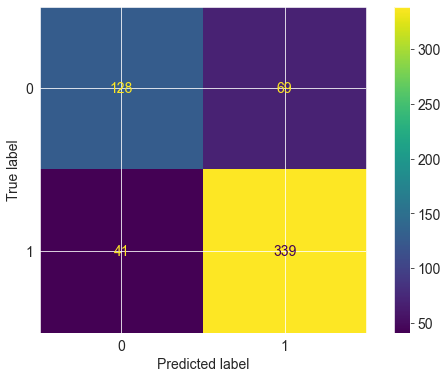

In [28]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(model, test_inputs, test_targets)

Our model predicted the following:
- **True Negative:** 128, this represents the number of restaurants predicted by the model to be closed, which were actually closed and hence, satisfactory.
- **True Positive:** 339, this number is the number of restaurants predicted as open and are actually open.
- **False Negative:** 41, this gives the number of restaurants that were predicted to be closed but were actually open giving  a false closed.
- **False Positive:** 60, these are the number of restaurants predicted as open but were actually closed giving  a false open.

Comparatively, there is a higher number of False Positives in our data which wrongly classifies closed restaurant as open.

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test 

In [29]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [30]:
train_preds = model.predict(X_train)

In [31]:
train_preds

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [32]:
train_targets

2595    1
2342    1
1348    1
133     1
2038    1
       ..
259     1
1456    1
1187    1
2401    1
2602    0
Name: is_open, Length: 1843, dtype: int64

We can output a probabilistic prediction using `predict_proba`.

In [33]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.05170424, 0.94829576],
       [0.0595634 , 0.9404366 ],
       [0.00821853, 0.99178147],
       ...,
       [0.15052205, 0.84947795],
       [0.53894807, 0.46105193],
       [0.28125972, 0.71874028]])

The numbers above indicate the probabilities for the target classes "No" and "Yes".

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(train_targets, train_preds)

0.8187737384698861

The model achieves an accuracy of 81.8% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.64126984, 0.35873016],
       [0.08903545, 0.91096455]])

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given set of inputs.

In [38]:
def predict_and_plot(inputs, targets, model, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 81.88%


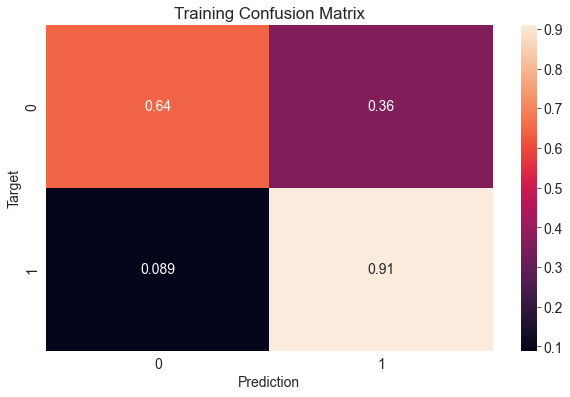

In [39]:
train_preds = predict_and_plot(X_train, train_targets, model, 'Training')

Accuracy: 77.87%


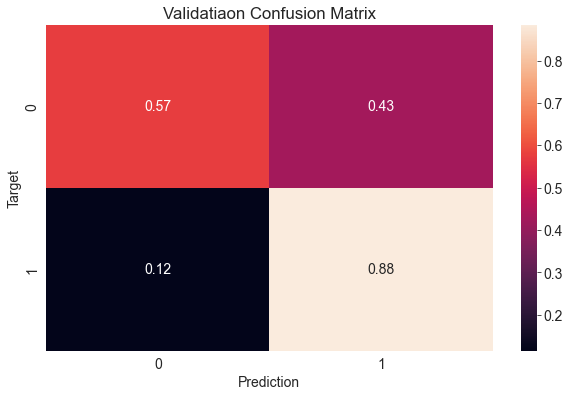

In [40]:
val_preds = predict_and_plot(X_val, val_targets, model, 'Validatiaon')

Accuracy: 80.94%


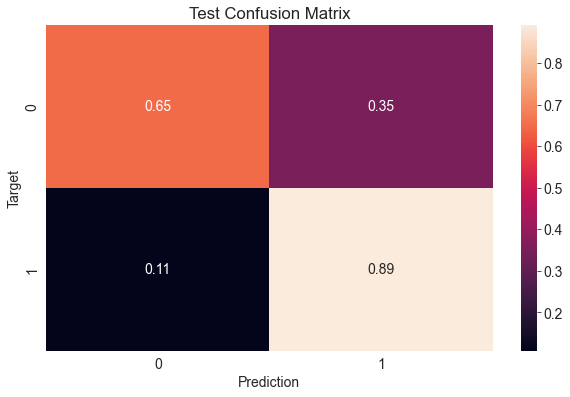

In [41]:
test_preds = predict_and_plot(X_test, test_targets, model, 'Test')

Our model predicted the following on the test set:
- **True Negative:** 65%, this represents the percentage of restaurants predicted by the model to be closed, which were actually closed and hence, satisfactory.
- **True Positive:** 89%, this number is the percentage of restaurants predicted as open and are actually open.
- **False Negative:** 0.11%, this gives the percentage of restaurants that were predicted to be closed but were actually open giving  a false closed.
- **False Positive:** 0.35%, these are the percentage of restaurants predicted as open but were actually closed giving  a false open.

Comparatively, there is a higher number of False Positives in our data which wrongly classifies closed restaurant as open.

The accuracy of the model on the test and validation set are above 75%, which suggests that our model generalizes well to data it hasn't seen before. 

But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "constant" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [42]:
def random_guess(inputs):
    return np.random.choice([0, 1], len(inputs))

In [43]:
def all_no(inputs):
    return np.full(len(inputs), 0)

Let's check the accuracies of these two models on the test set.

In [44]:
accuracy_score(test_targets, random_guess(X_test))

0.5355285961871751

In [45]:
accuracy_score(test_targets, all_no(X_test))

0.341421143847487

Our random model achieves an accuracy of 48% and our "always No" model achieves an accuracy of 34%. 

Our model is better than a "constant" or "random" model. By comparing agaisnt these baseline models, we now know that our model has learned something useful about the dataset.

## Making Predictions on a Single Input

Once the model has been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary containing data collected from a new hypothetical restaurant.

In [46]:
new_input = {'latitude': 28.09236,
 'longitude': -82.500588,
 'stars': 4.0,
 'review_count': 108.0,
 'is_open': 1.0,
 'is_chain': 0.0,
 'Num_of_attributes_shared': 22.0,
 'RestaurantsPriceRange2': 2.0,
 'RestaurantsTakeOut_True': 1.0,
 'RestaurantsTakeOut_False': 0.0,
 'RestaurantsDelivery_True': 0.0,
 'RestaurantsDelivery_False': 1.0,
 'OutdoorSeating_True': 1.0,
 'OutdoorSeating_False': 0.0,
 'RestaurantsReservations_True': 0.0,
 'RestaurantsReservations_False': 1.0,
 'RestaurantsGoodForGroups_True': 1.0,
 'RestaurantsGoodForGroups_False': 0.0,
 'GoodForKids_True': 1.0,
 'GoodForKids_False': 0.0,
 'Nightlife': 1.0,
 'Bars': 1.0,
 'Sandwiches': 0.0,
 'American (Traditional)': 0.0,
 'American (New)': 0.0,
 'Fast Food': 0.0,
 'Breakfast & Brunch': 0.0,
 'Pizza': 0.0,
 'Burgers': 0.0,
 'Coffee & Tea': 0.0,
 'Mexican': 0.0,
 'Cafes': 0.0,
 'Seafood': 0.0,
 'Italian': 0.0,
 'Chicken Wings': 0.0,
 'Salad': 0.0,
 'Event Planning & Services': 0.0,
 'Latin American': 0.0,
 'Food Trucks': 0.0,
 'Specialty Food': 0.0,
 'Chinese': 0.0,
 'Delis': 1.0,
 'Sushi Bars': 0.0,
 'Desserts': 0.0,
 'Caterers': 0.0,
 'repeat_users': 7.0,
 'age': 12.01917808219178,
 'reviews_per_week': 0.1715320690389942,
 'reactions_per_week': 0.3773705518857873,
 'sentiment_score': 0.7482330434782607,
 'review_length': 95.23478260869564,
 'user_stars': 4.0,
 'similar_restaurants_density': 6.0,
 'all_restaurants_density': 38.0,
 'relative_reviews_count': 0.2163363754441612,
 'relative_reviews_per_week': -0.354673205452649,
 'relative_stars': 0.6898619704579713,
 'relative_user_stars': 0.2666421247997236,
 'relative_repeat_users': 0.8125571700297433,
 'relative_price': 0.5952291104443191}

The first step is to convert the dictionary into a Pandas dataframe, similar to `raw_df`. This can be done by passing a list containing the given dictionary to the `pd.DataFrame` constructor.

In [47]:
new_input_df = pd.DataFrame([new_input])

In [48]:
new_input_df

,latitude,longitude,stars,review_count,is_open,is_chain,Num_of_attributes_shared,RestaurantsPriceRange2,RestaurantsTakeOut_True,RestaurantsTakeOut_False,RestaurantsDelivery_True,RestaurantsDelivery_False,OutdoorSeating_True,OutdoorSeating_False,RestaurantsReservations_True,RestaurantsReservations_False,RestaurantsGoodForGroups_True,RestaurantsGoodForGroups_False,GoodForKids_True,GoodForKids_False,Nightlife,Bars,Sandwiches,American (Traditional),American (New),Fast Food,Breakfast & Brunch,Pizza,Burgers,Coffee & Tea,Mexican,Cafes,Seafood,Italian,Chicken Wings,Salad,Event Planning & Services,Latin American,Food Trucks,Specialty Food,Chinese,Delis,Sushi Bars,Desserts,Caterers,repeat_users,age,reviews_per_week,reactions_per_week,sentiment_score,review_length,user_stars,similar_restaurants_density,all_restaurants_density,relative_reviews_count,relative_reviews_per_week,relative_stars,relative_user_stars,relative_repeat_users,relative_price
0,28.09236,-82.500588,4.0,108.0,1.0,0.0,22.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,12.019178,0.171532,0.377371,0.748233,95.234783,4.0,6.0,38.0,0.216336,-0.354673,0.689862,0.266642,0.812557,0.595229


We've now created a Pandas dataframe with the same columns as `df` (except `is_open`, which needs to be predicted). The dataframe contains just one row of data, containing the given input.


We must now apply the same transformations applied while training the model:

1. Imputation of missing values using the `imputer` created earlier
2. Scaling numerical features using the `scaler` created earlier
3. Encoding categorical features using the `encoder` created earlier

In [49]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

In [50]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

,is_chain,Num_of_attributes_shared,RestaurantsPriceRange2,RestaurantsTakeOut_True,RestaurantsTakeOut_False,RestaurantsDelivery_True,RestaurantsDelivery_False,OutdoorSeating_True,OutdoorSeating_False,RestaurantsReservations_True,RestaurantsReservations_False,RestaurantsGoodForGroups_True,RestaurantsGoodForGroups_False,GoodForKids_True,GoodForKids_False,Nightlife,Bars,Sandwiches,American (Traditional),American (New),Fast Food,Breakfast & Brunch,Pizza,Burgers,Coffee & Tea,Mexican,Cafes,Seafood,Italian,Chicken Wings,Salad,Event Planning & Services,Latin American,Food Trucks,Specialty Food,Chinese,Delis,Sushi Bars,Desserts,Caterers,repeat_users,age,reviews_per_week,reactions_per_week,sentiment_score,review_length,user_stars,similar_restaurants_density,all_restaurants_density,relative_reviews_count,relative_reviews_per_week,relative_stars,relative_user_stars,relative_repeat_users
0,0.0,0.677419,0.333333,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.055118,0.782478,0.019749,0.008268,0.868103,0.233893,0.75,0.092308,0.148148,0.167623,0.154779,0.700973,0.693891,0.261498


We can now make a prediction using `model.predict`.

In [51]:
prediction = model.predict(X_new_input)[0]

In [52]:
prediction

1

Our model predicts that this restaurant will be open. We can check the probability of the prediction.

In [53]:
prob = model.predict_proba(X_new_input)[0]

In [54]:
prob

array([0.23441451, 0.76558549])

The model predicts that the restaurant will be open with a probability of 71.5%

Let's define a helper function to make predictions for individual inputs.

In [55]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

## Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk. 

Let's first create a dictionary containing all the required objects.

In [56]:
Tampa_restaurants = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

We can now save this to a file using `joblib.dump`

In [57]:
joblib.dump(Tampa_restaurants, 'Tampa_restaurants.joblib')

['Tampa_restaurants.joblib']